In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [107]:
# engine specified to supress "'c' engine does not support regex separators" warning
inputs = pd.read_csv('C:/Users/abcd/Desktop/ML to-dos/CS229/Problem sets/pset1_data/logistic_x.txt', delimiter='\ +', header=None, engine='python')
outputs = pd.read_csv('C:/Users/abcd/Desktop/ML to-dos/CS229/Problem sets/pset1_data/logistic_y.txt', delimiter='\ +', header=None, engine='python')

In [108]:
inputs.describe()
#outputs.describe()
inputs.shape
inputs['label'] = outputs.astype({0: 'int32'})[0].values
inputs.head()

,0,1
count,99.000000,99.000000
mean,3.923295,-0.349697
std,1.929964,1.771731
min,0.570799,-4.006504
25%,2.253922,-1.690592
50%,3.717708,-0.219744
75%,5.600951,1.110637
max,7.705401,3.812866


(99, 2)

,0,1,label
0,1.343250,-1.331148,-1
1,1.820553,-0.634668,-1
2,0.986321,-1.888576,-1
3,1.944373,-1.635452,-1
4,0.976734,-1.353315,-1


#### Newton-Raphson method:
Generalisation of Newton's method for vector-valued $\theta$
<p style="text-align: center;"> 
    $\theta : \theta - H^{-1}\nabla_{\theta}J(\theta)$ <br/>

</p>

Nabla:
<p style="text-align: center;"> 
    $\frac{\partial{J}}{\partial{\theta_{i}}} = \frac{1}{m} \Sigma_{k=1}^{m}(g(z) - 1)y^{(k)}x^{(k)}_{i}$
</p>

Hessian:
<p style="text-align: center;"> 
    $H_{ij} = \frac{1}{m} \Sigma_{k=1}^{m}(g(z))(1 - g(z))y^{(k)}x^{(k)}_{j}y^{(k)}x^{(k)}_{i}$ <br/>
</p>
<br/>
Since it's a binary class problem, such that $y^{(k)} \epsilon \, \{-1 , 1\}$ <br/>
<p style="text-align: center;"> <br/>
    $H_{ij} = \frac{1}{m} \Sigma_{k=1}^{m}(g(z))(1 - g(z))x^{(k)}_{j}x^{(k)}_{i}$ <br/>
</p>
where <br/>
<p style="text-align: center;"> 
    $g(z) = \frac{1}{1 + e^{-z}}$ <br/><br/>
    $z^{(k)} = y^{(k)}\theta^{T}x^{(k)}$ 
</p>

In [109]:
# create an array of features with x0 for intercept
X = inputs[[0, 1]].values
X = np.hstack((np.ones((X.shape[0], 1), dtype=int), X))

y = outputs[0].values

In [112]:
iterations = 0
MIN_TOLERANCE_REQD = 1e-10
tolerance = 1e10
n = X.shape[1]
theta = np.zeros(n)

while tolerance > MIN_TOLERANCE_REQD:
    iterations += 1
    zs = np.multiply(y, (theta @ X.T))
    gs = 1 / (1 + np.exp(-zs))
    # elemen-twise product and mean along the row
    nabla = np.mean((gs - 1) * y * X.T, axis=1)
    
    hessian = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1):
            hessian[i][j] = np.mean(gs * (1 - gs) * X[:,j] * X[:,i])
            if i != j:
                hessian[j][i] = hessian[i][j]
                
    delta = np.linalg.inv(hessian) @ nabla
    #deep copy theta before updating
    prevTheta = theta.copy()
    theta -= delta
    tolerance = np.sum(np.abs(theta - prevTheta))
    
print(f"Converged after {iterations} iterations")

Converged after 7 iterations


In [113]:
# Scatter plot of the classes as per features x1 and x2
# fig, ax = plt.subplots(figsize=(5,5))
# plt.scatter(inputs[0].values, inputs[1].values, c=outputs.astype({0: 'int32'})[0].values, cmap = 'rainbow')
# ax.set_title('Sactter of labels')
# ax.set_xlabel('x1')
# ax.set_ylabel('x2')
# plt.show();

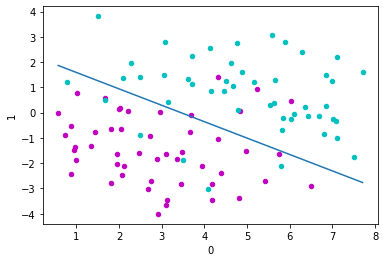

In [114]:
ax = plt.axes()

inputs.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='m')
inputs.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='c')

x1_vector = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 5)
y_vector = (theta[0] + theta[1] * x1_vector) / (- theta[2])
plt.plot(x1_vector, y_vector)
plt.show();